#***Importing libraries and dataframe***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('RJ-2022.csv')

#***Exploratory data analysis***

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,288,2023-03-01,1.86,1,264,19,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,624,3,86,2023-03-27,0.56,3,357,1,NaN
2,200568,30m of Ipa Beach e fins de semana special price !,980805,Henrique,NaN,Ipanema,-22.98586,-43.19411,Entire home/apt,100,30,198,2023-02-13,1.45,6,59,9,NaN
3,342874,Comfortable in Copacabana beach,829630,Luciana,NaN,Leme,-22.96392,-43.17263,Entire home/apt,236,2,159,2023-02-26,1.19,3,105,31,NaN
4,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,307,3,262,2023-03-27,1.68,1,257,14,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30476 entries, 0 to 30475
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30476 non-null  int64  
 1   name                            30458 non-null  object 
 2   host_id                         30476 non-null  int64  
 3   host_name                       30473 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   30476 non-null  object 
 6   latitude                        30476 non-null  float64
 7   longitude                       30476 non-null  float64
 8   room_type                       30476 non-null  object 
 9   price                           30476 non-null  int64  
 10  minimum_nights                  30476 non-null  int64  
 11  number_of_reviews               30476 non-null  int64  
 12  last_review                     

In [28]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.045500e+04,3.045500e+04,30455.000000,30455.000000,30455.000000,30455.000000,30455.000000,22967.000000,30455.000000,30455.000000,30455.000000
mean,2.858026e+17,1.568552e+08,-22.967221,-43.250335,981.051880,4.853193,18.272468,1.014724,9.814086,210.380693,6.636283
std,3.618918e+17,1.608316e+08,0.035217,0.099716,8627.972592,24.361153,38.513135,1.082807,28.249500,136.073952,10.832516
min,1.787800e+04,3.607000e+03,-23.073276,-43.701286,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.867920e+07,2.083224e+07,-22.984780,-43.308558,200.000000,1.000000,1.000000,0.230000,1.000000,85.000000,0.000000
50%,4.814557e+07,8.378613e+07,-22.972630,-43.195520,350.000000,2.000000,4.000000,0.700000,2.000000,212.000000,2.000000
75%,7.053117e+17,2.773585e+08,-22.954765,-43.185842,650.000000,4.000000,17.000000,1.440000,4.000000,359.000000,8.000000
max,8.570784e+17,5.072126e+08,-22.749690,-43.104400,595793.000000,1125.000000,588.000000,17.010000,224.000000,365.000000,146.000000


***Some adjustments***

In [4]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True) #Drop empty columns
df.dropna(subset=['name', 'host_name'], inplace=True) #Drop rows with empty values in ['name', 'host_name'] columns
df.drop(df[df['price'] >= 5000].index, inplace=True) # Removing outliers

***Analysing neighbourhoods***

In [5]:
toppriceHoods = df.groupby('neighbourhood').price.mean().reset_index().sort_values('price', ascending=False).head() # Df with the top priced neighbourhoods
lowerpriceHoods = df.groupby('neighbourhood').price.mean().reset_index().sort_values('price').head() # Df with the top priced neighbourhoods

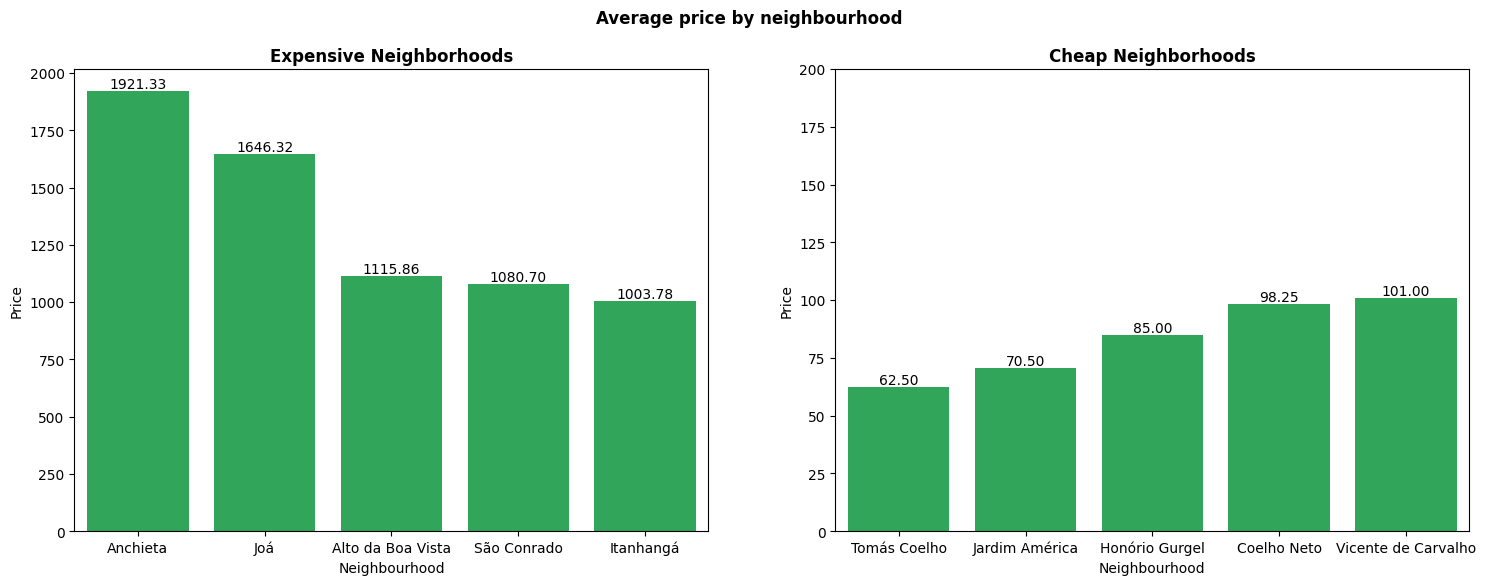

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=toppriceHoods, y='price', x='neighbourhood', color='#1DB954', ax=ax1)
ax1.set_title('Expensive Neighborhoods', fontweight='bold')
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Price')
sns.barplot(data=lowerpriceHoods, y='price', x='neighbourhood', color='#1DB954', ax=ax2)
ax2.set_title('Cheap Neighborhoods', fontweight='bold')
ax2.set_xlabel('Neighbourhood')
ax2.set_ylabel('Price')
ax2.set_ylim(0, 200)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

fig.suptitle('Average price by neighbourhood', fontweight='bold')
plt.show()

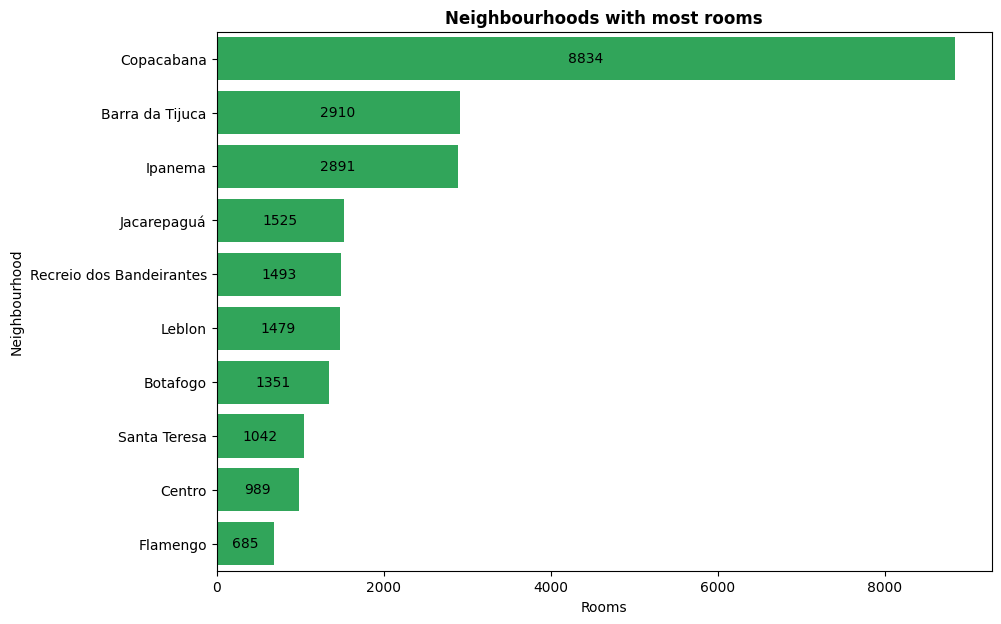

In [186]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='neighbourhood', color='#1DB954',
              order=df['neighbourhood'].value_counts().index[:10])

plt.title('Neighbourhoods with most rooms', fontweight='bold')
plt.xlabel('Rooms')
plt.ylabel('Neighbourhood')

for i, count in enumerate(df['neighbourhood'].value_counts().values[:10]):
  plt.annotate(str(count), xy=(count / 2, i), ha='center', va='center')

fig.show()